# Predicting the temperature , where fire occured or not occured

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Importing the Data

In [113]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df = df.drop([122,123],axis=0)
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

In [114]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [115]:
df.shape

(244, 14)

# Creating a new column Region.

In [117]:
df['Region'] = ''
df[:122]=df[:122].replace('','Bejaia')
df[122:245]=df[122:245].replace('','Sidi-Bel')

In [118]:
df.shape

(244, 15)

In [119]:
# finding the null value 
df[df.isnull().any(axis=1)]

day month  year Temperature  RH  Ws Rain   FFMC   DMC      DC   ISI   BUI  \
165  14    07  2012          37  37  18   0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes      Region  
165  fire          NaN  Sidi-Bel

As we know that the values are misplaced, we can replace those values or drop this row altogther. droping the row.

In [120]:
df = df.drop([165],axis=0)
df.reset_index(inplace=True)

In [121]:
df=df.drop('index',axis=1)

In [122]:
df.isnull().sum().sum() # No null values present on dataset.

0

In [123]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [124]:
#Erasing the white spaces in the columns

In [125]:
df.columns = df.columns.str.strip()

In [126]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [127]:
#Checking the unique value in categorical column

In [128]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [129]:
#erasing the white spaces in the column
df['Classes'] = df['Classes'].str.strip()

In [130]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

# Unique Values in dataset

In [225]:
for i in df.columns:
    #print(i,'\n',data[i].value_counts(),'\n','***'*20,'\n')
    print(f'Column name: [{i}]\n{df[i].value_counts()}\n','***'*20,'\n')

Column name: [Temperature]
35    29
31    25
34    24
33    23
30    22
32    21
36    21
29    18
28    15
27     8
37     8
25     6
39     6
26     5
24     3
38     3
40     3
22     2
42     1
Name: Temperature, dtype: int64
 ************************************************************ 

Column name: [RH]
64    10
55    10
58     8
54     8
78     8
      ..
21     1
90     1
24     1
38     1
26     1
Name: RH, Length: 62, dtype: int64
 ************************************************************ 

Column name: [Ws]
14    43
15    40
13    30
17    28
16    27
18    25
19    15
21     8
11     7
12     7
10     3
9      2
20     2
22     2
26     1
8      1
6      1
29     1
Name: Ws, dtype: int64
 ************************************************************ 

Column name: [Rain]
0.0     133
0.1      18
0.2      11
0.3      10
0.4       8
0.7       6
0.6       6
0.5       5
1.1       3
1.2       3
2.0       3
1.8       3
0.8       2
2.9       2
1.3       2
3.8       2
1.4       2

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    object
dtypes: object(15)
memory usage: 28.6+ KB


In [133]:
dfcopy = df.copy()

In [134]:
df.describe()

day month  year Temperature   RH   Ws Rain  FFMC  DMC   DC  ISI  BUI  \
count   243   243   243         243  243  243  243   243  243  243  243  243   
unique   31     4     1          19   62   18   39   173  165  197  106  173   
top      01    08  2012          35   64   14    0  88.9  7.9    8  1.1    3   
freq      8    62   243          29   10   43  133     7    5    5    8    5   

        FWI Classes  Region  
count   243     243     243  
unique  126       2       2  
top     0.4    fire  Bejaia  
freq     12     137     122

In [136]:
df['dateInt']=df['year'].astype(str) + df['month'].astype(str).str.zfill(2)+ df['day'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d')

In [137]:
df.head()

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

    Classes  Region   dateInt       Date  
0  not fire  Bejaia  20120601 2012-06-01  
1  not fire  Bejaia  20120602 2012-06-02  
2  not fire  Bejaia  20120603 2012-06-03  
3  not fire  Bejaia  20120604 2012-06-04  
4  not fire  Bejaia  20120605 2012-06-05

In [138]:
df = df.drop(['day','month','year','dateInt'],axis=1)

In [139]:
Column_list = ["Temperature",'RH','Ws','Rain',"FFMC","DMC","DC","ISI","BUI","FWI"]
for i in Column_list:
    df[i] = pd.to_numeric(df[i])

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  243 non-null    int64         
 1   RH           243 non-null    int64         
 2   Ws           243 non-null    int64         
 3   Rain         243 non-null    float64       
 4   FFMC         243 non-null    float64       
 5   DMC          243 non-null    float64       
 6   DC           243 non-null    float64       
 7   ISI          243 non-null    float64       
 8   BUI          243 non-null    float64       
 9   FWI          243 non-null    float64       
 10  Classes      243 non-null    object        
 11  Region       243 non-null    object        
 12  Date         243 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 24.8+ KB


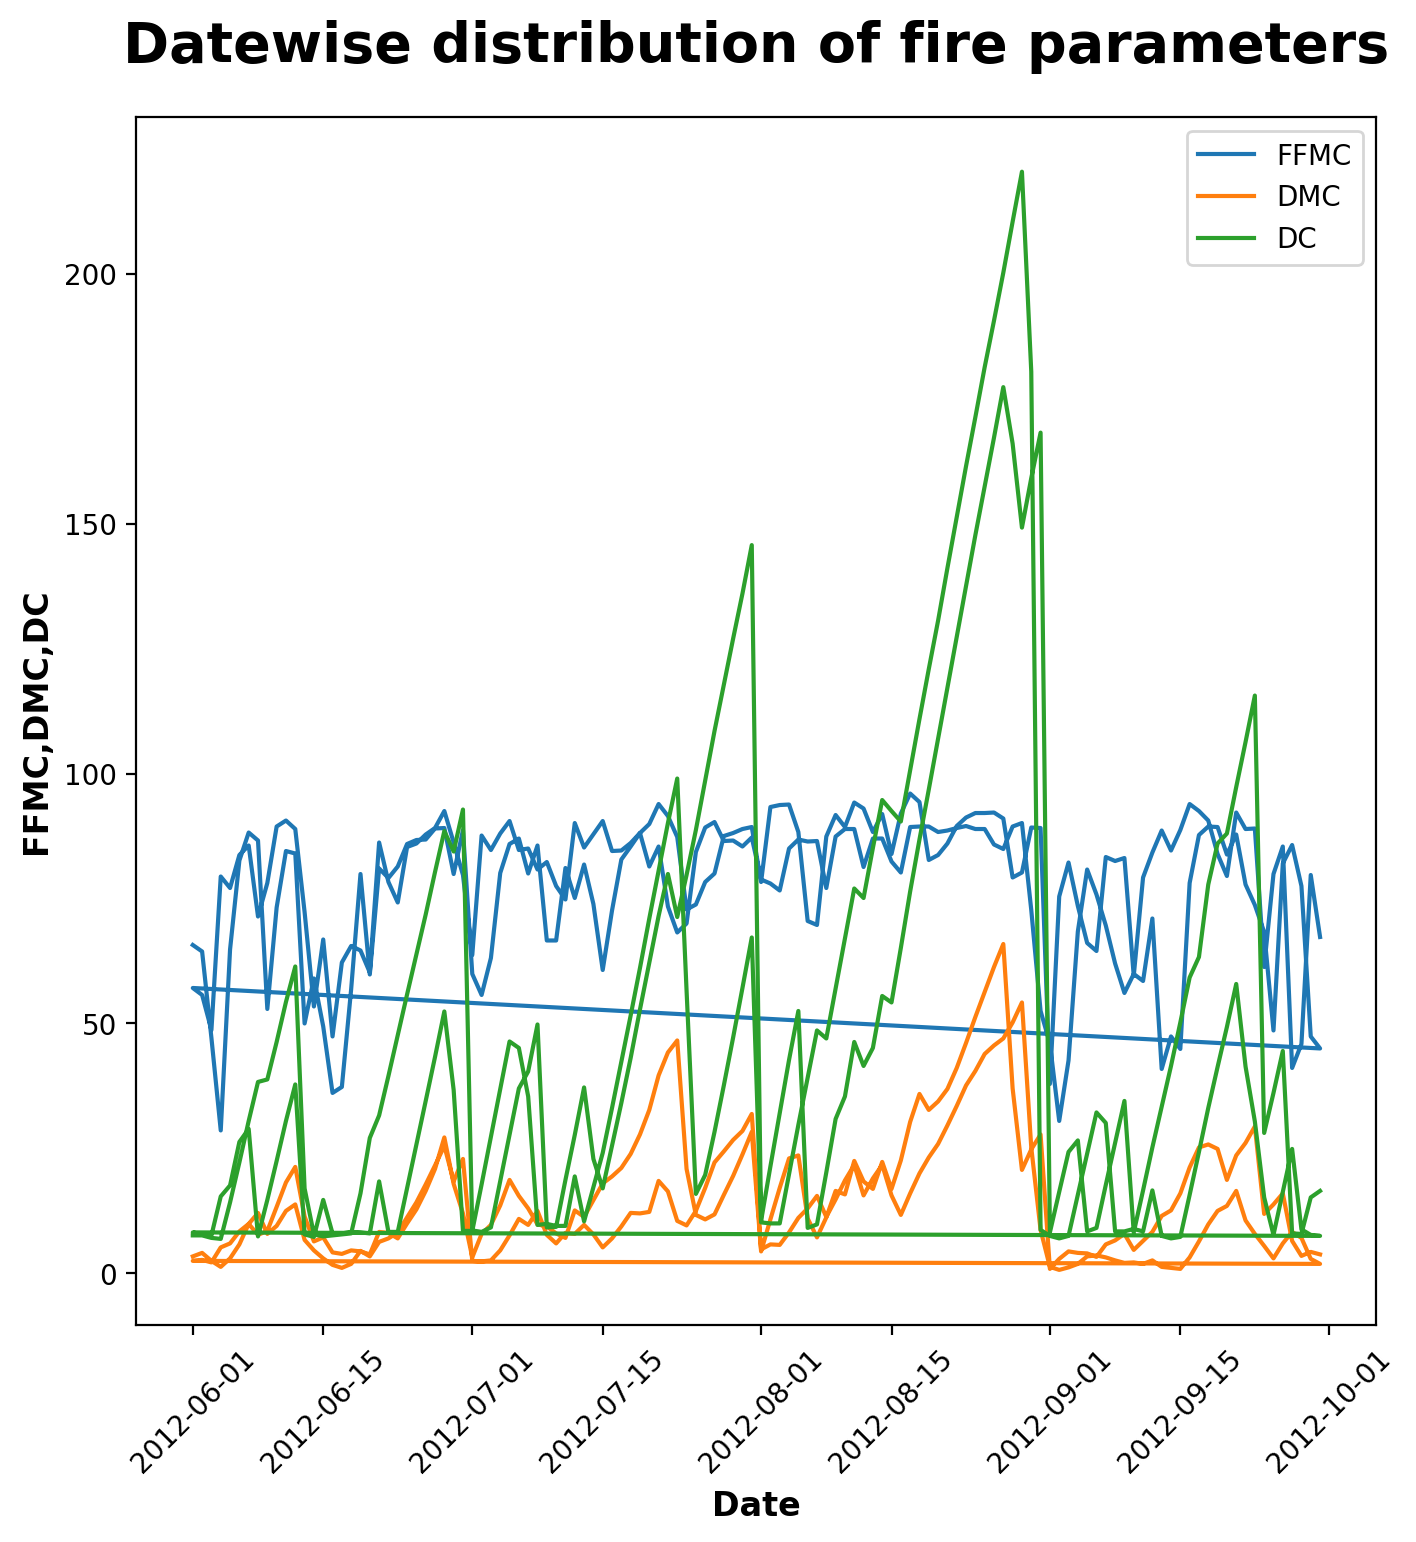

In [141]:
plt.figure(figsize=(8,8),dpi=200)
plt.title("Datewise distribution of fire parameters", weight="bold",fontsize=20, pad=20)
plt.ylabel("FFMC,DMC,DC", weight="bold", fontsize=12)
plt.xlabel("Date", weight="bold", fontsize=12)
plt.plot( "Date","FFMC",data = df)
plt.plot("Date","DMC",data = df)
plt.plot("Date","DC",data = df)
plt.xticks(rotation =45)
plt.legend()
plt.show()

Obsrvation: we can observe hre that There is a spike in DC level between 17-07 to 15-09.

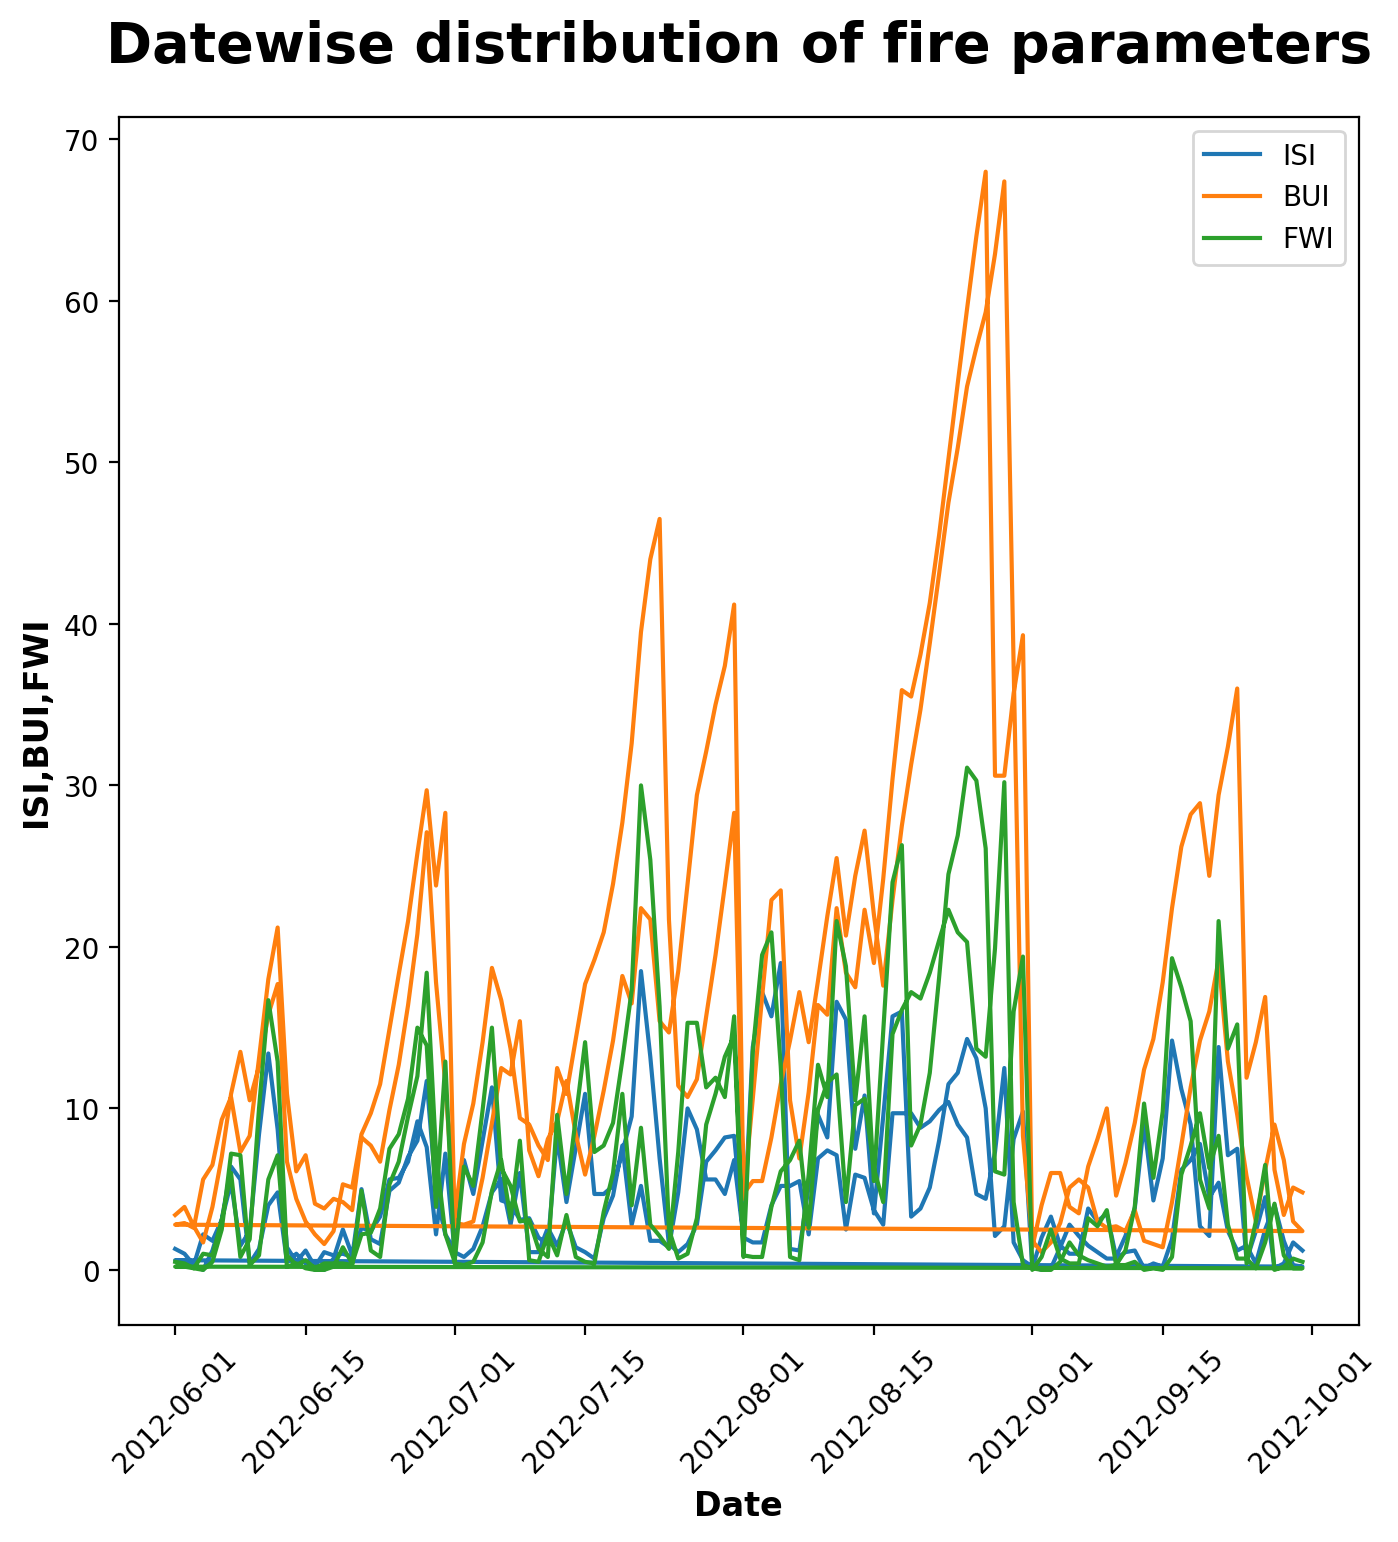

In [142]:
plt.figure(figsize=(8,8),dpi=200)
plt.title("Datewise distribution of fire parameters", weight="bold",fontsize=20, pad=20)
plt.ylabel("ISI,BUI,FWI", weight="bold", fontsize=12)
plt.xlabel("Date", weight="bold", fontsize=12)
plt.plot( "Date","ISI",data = df)
plt.plot("Date","BUI",data = df)
plt.plot("Date","FWI",data = df)
plt.xticks(rotation =45)
plt.legend()
plt.show()

Same spike for BUI

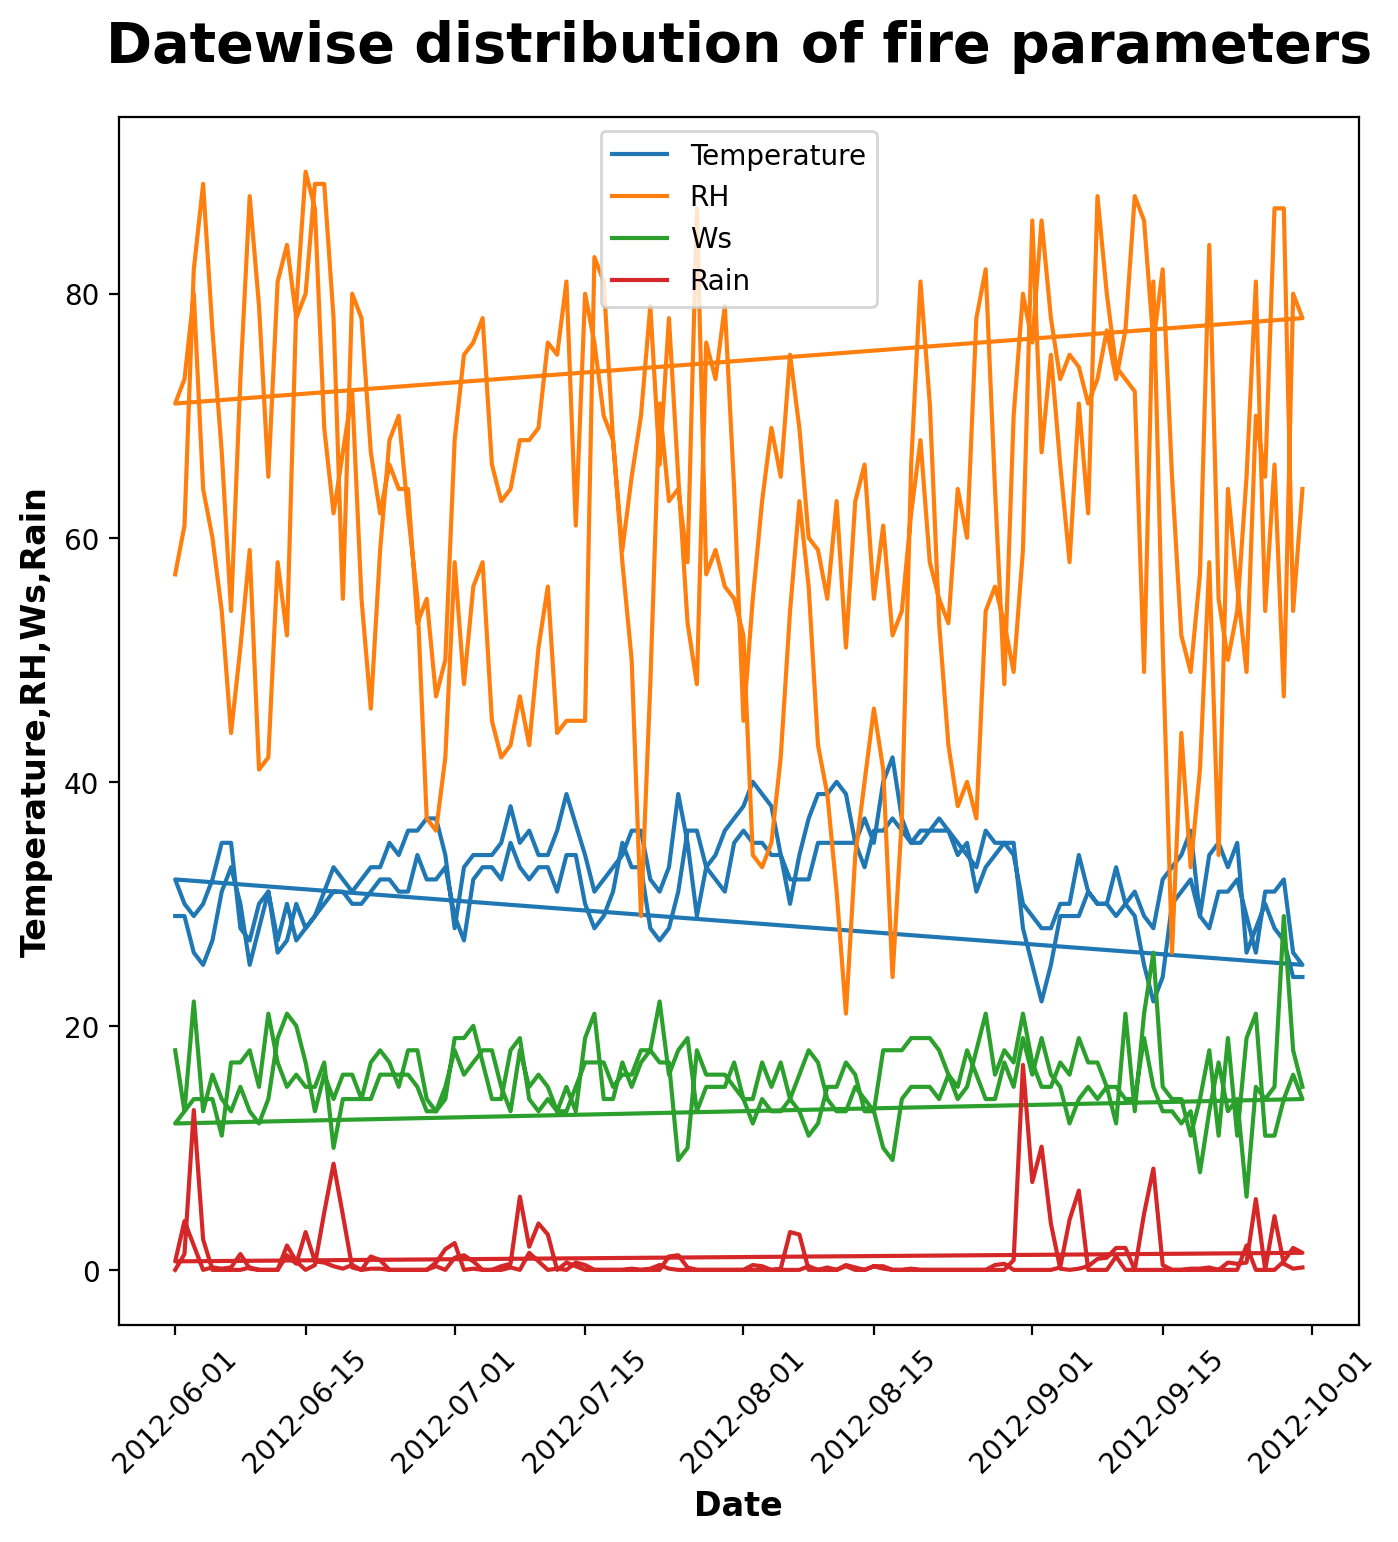

In [143]:
plt.figure(figsize=(8,8),dpi=200)
plt.title("Datewise distribution of fire parameters", weight="bold",fontsize=20, pad=20)
plt.ylabel("Temperature,RH,Ws,Rain", weight="bold", fontsize=12)
plt.xlabel("Date", weight="bold", fontsize=12)
plt.plot( "Date","Temperature",data = df)
plt.plot("Date",'RH',data = df)
plt.plot("Date",'Ws',data = df)
plt.plot("Date",'Rain',data = df)
plt.xticks(rotation =45)
plt.legend()
plt.show()

Betwwen the same dates RH is low, temp is high , Rain and wind speed are kind of same.

In [144]:
g = df.groupby(['Classes','Date'])

In [145]:
g.first()

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
Classes  Date                                                                 
fire     2012-06-06           31  67  14   0.0  82.6   5.8  22.2  3.1   7.0   
         2012-06-07           33  54  13   0.0  88.2   9.9  30.5  6.4  10.9   
         2012-06-08           30  73  15   0.0  86.6  12.1  38.3  5.6  13.5   
         2012-06-10           30  41  15   0.0  89.4  13.3  22.5  8.4  13.1   
         2012-06-11           31  65  14   0.0  84.5  12.5  54.3  4.0  15.8   
...                          ...  ..  ..   ...   ...   ...   ...  ...   ...   
not fire 2012-09-26           31  54  11   0.0  82.0   6.0  16.3  2.5   6.2   
         2012-09-27           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
         2012-09-28           32  47  14   0.7  77.5   7.1   8.8  1.8   6.8   
         2012-09-29           26  80  16   1.8  47.4   2.9   7.7  0.3   3.0   
         2012-09-30           25  78  14   1.4  45.0   1.9   7.5  0.2   2.4   

                      FWI    Region  
Classes  Date                        
fire     2012-06-06   2.5    Bejaia  
         2012-06-07   7.2    Bejaia  
         2012-06-08   7.1    Bejaia  
         2012-06-10  10.0  Sidi-Bel  
         2012-06-11   5.6    Bejaia  
...                   ...       ...  
not fire 2012-09-26   1.7    Bejaia  
         2012-09-27   0.0  Sidi-Bel  
         2012-09-28   0.9    Bejaia  
         2012-09-29   0.1    Bejaia  
         2012-09-30   0.1    Bejaia  

[165 rows x 11 columns]

In [146]:
# Datewise where fire happened.
g.Classes.first()['fire']

Date
2012-06-06    fire
2012-06-07    fire
2012-06-08    fire
2012-06-10    fire
2012-06-11    fire
              ... 
2012-09-21    fire
2012-09-22    fire
2012-09-23    fire
2012-09-26    fire
2012-09-27    fire
Name: Classes, Length: 90, dtype: object

In [147]:
#Categorical columns and numerical columns
Numeric_columns=df.select_dtypes(include=np.number).columns.tolist()
categorical_col=set(df.columns).difference(set(Numeric_columns))
# numeric cols to numeric
print(categorical_col)
print(Numeric_columns)

{'Date', 'Classes', 'Region'}
['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


# Univariate Analysis

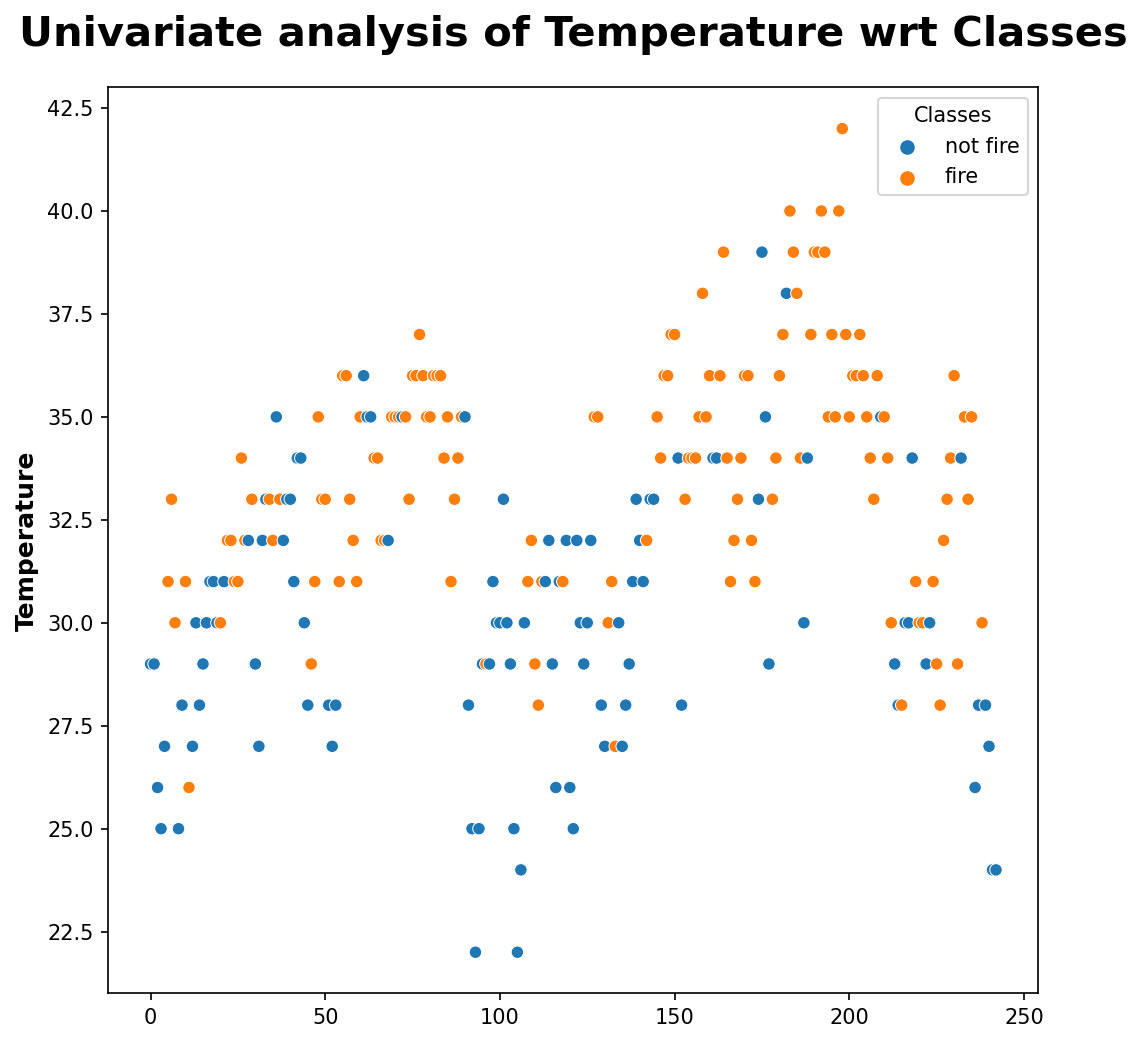

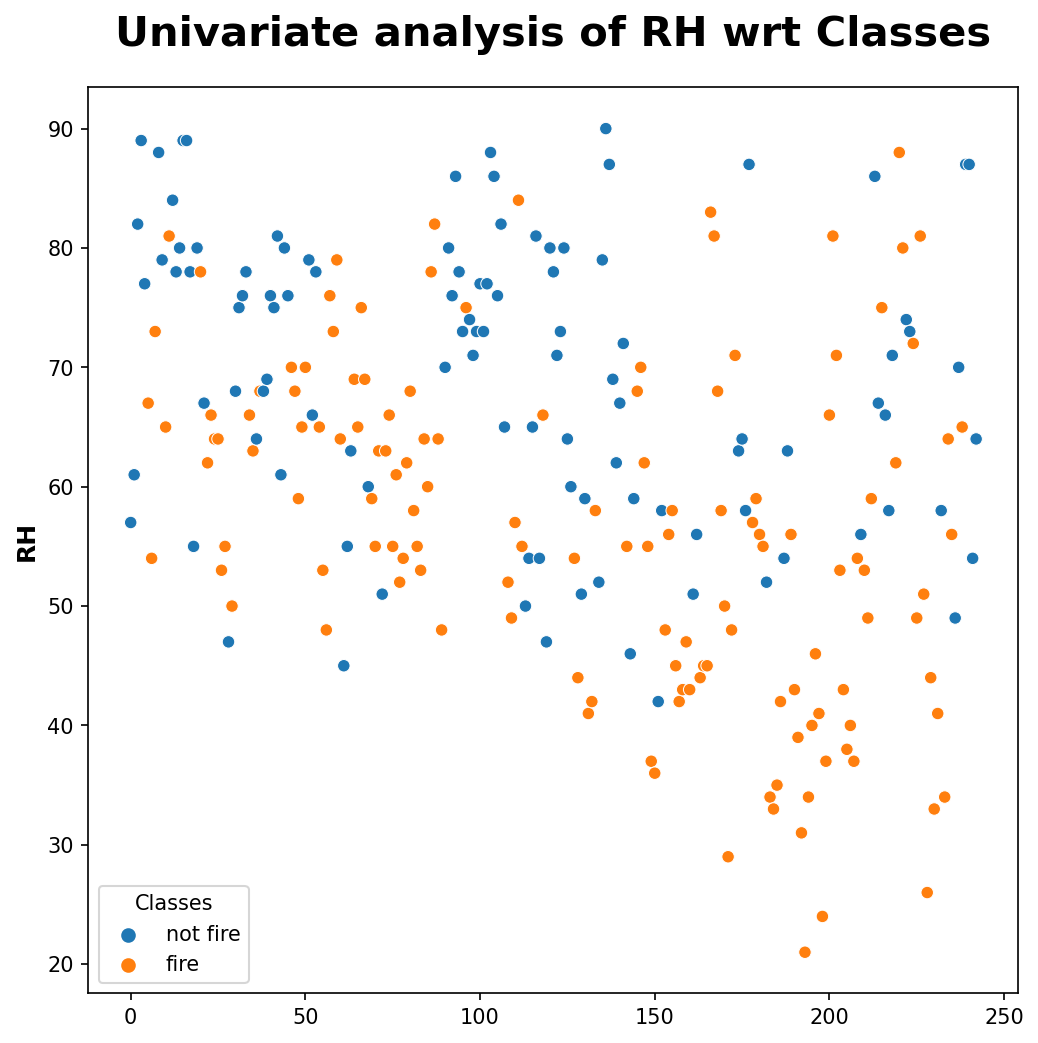

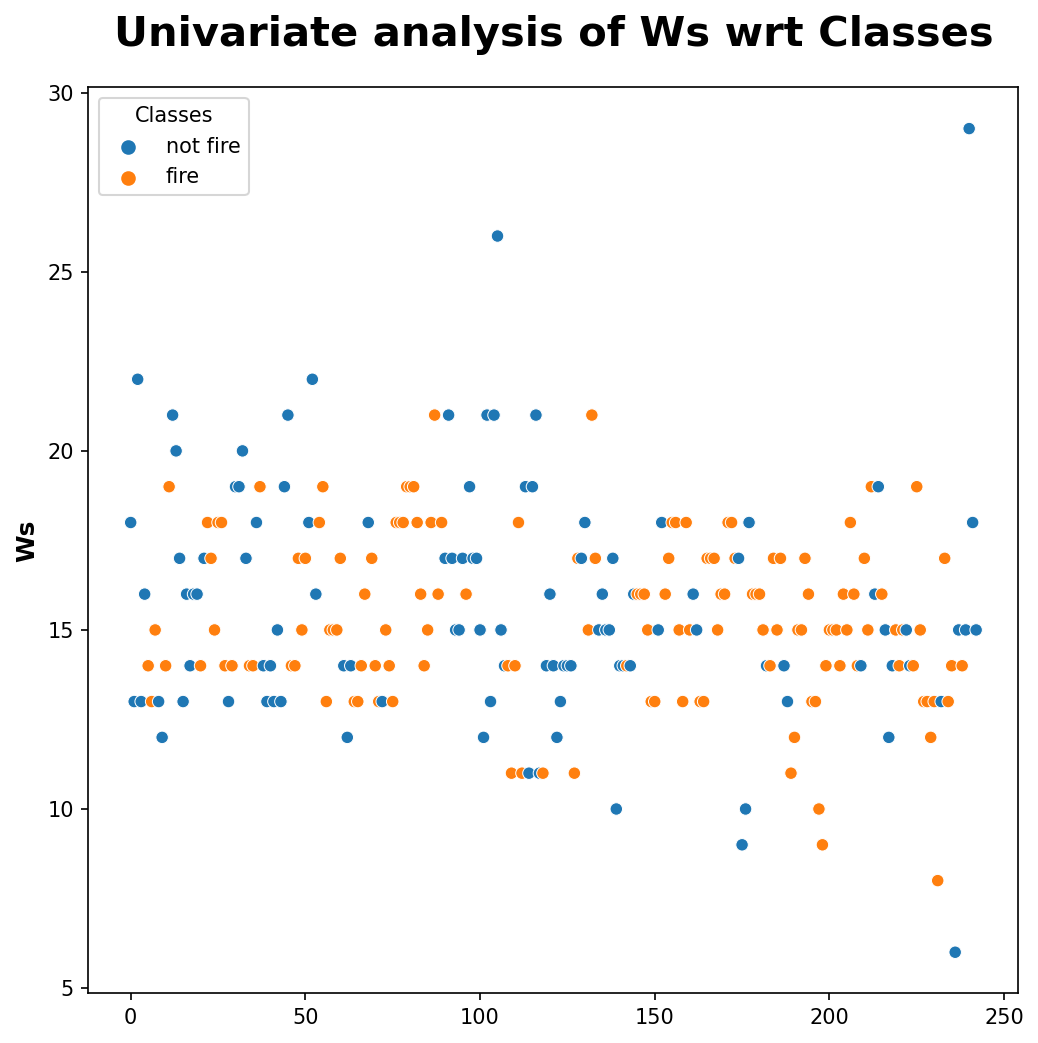

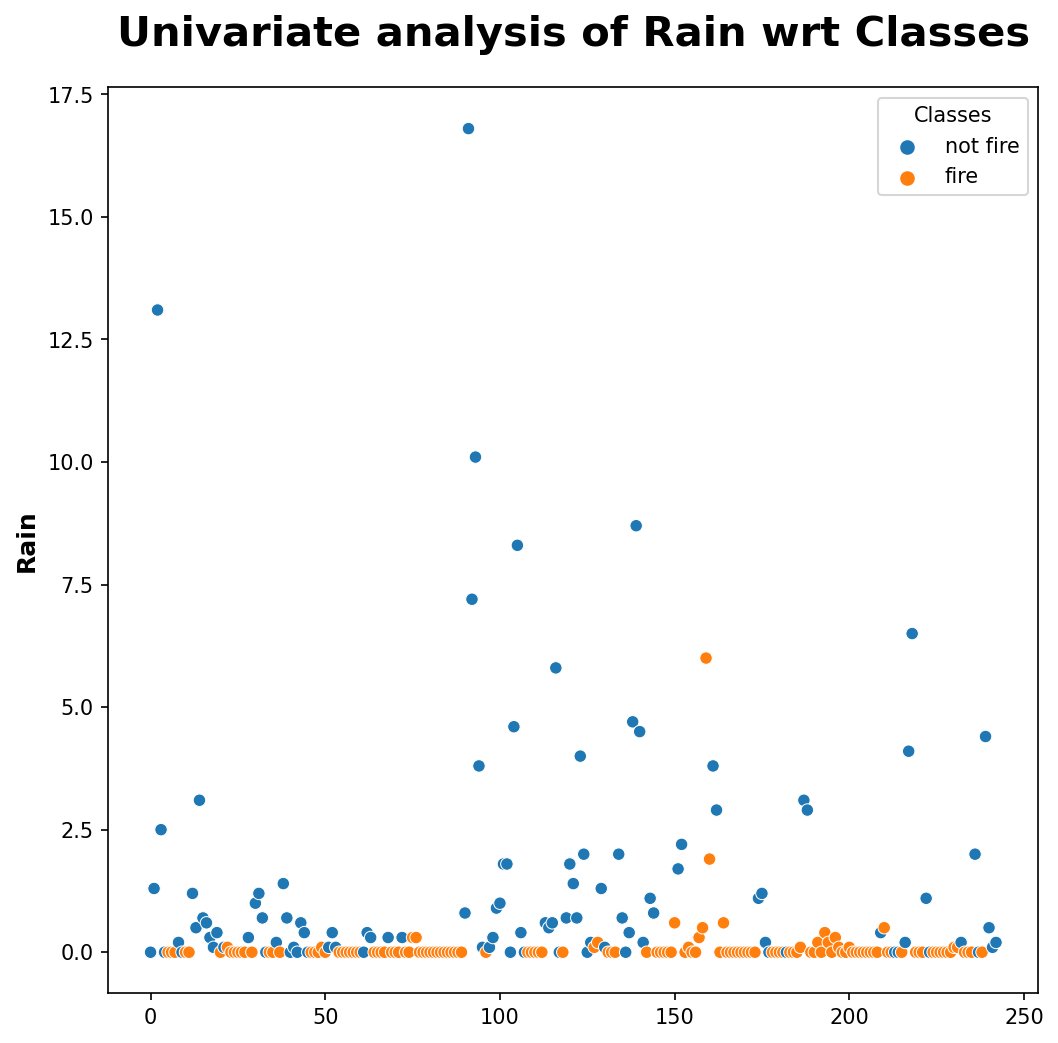

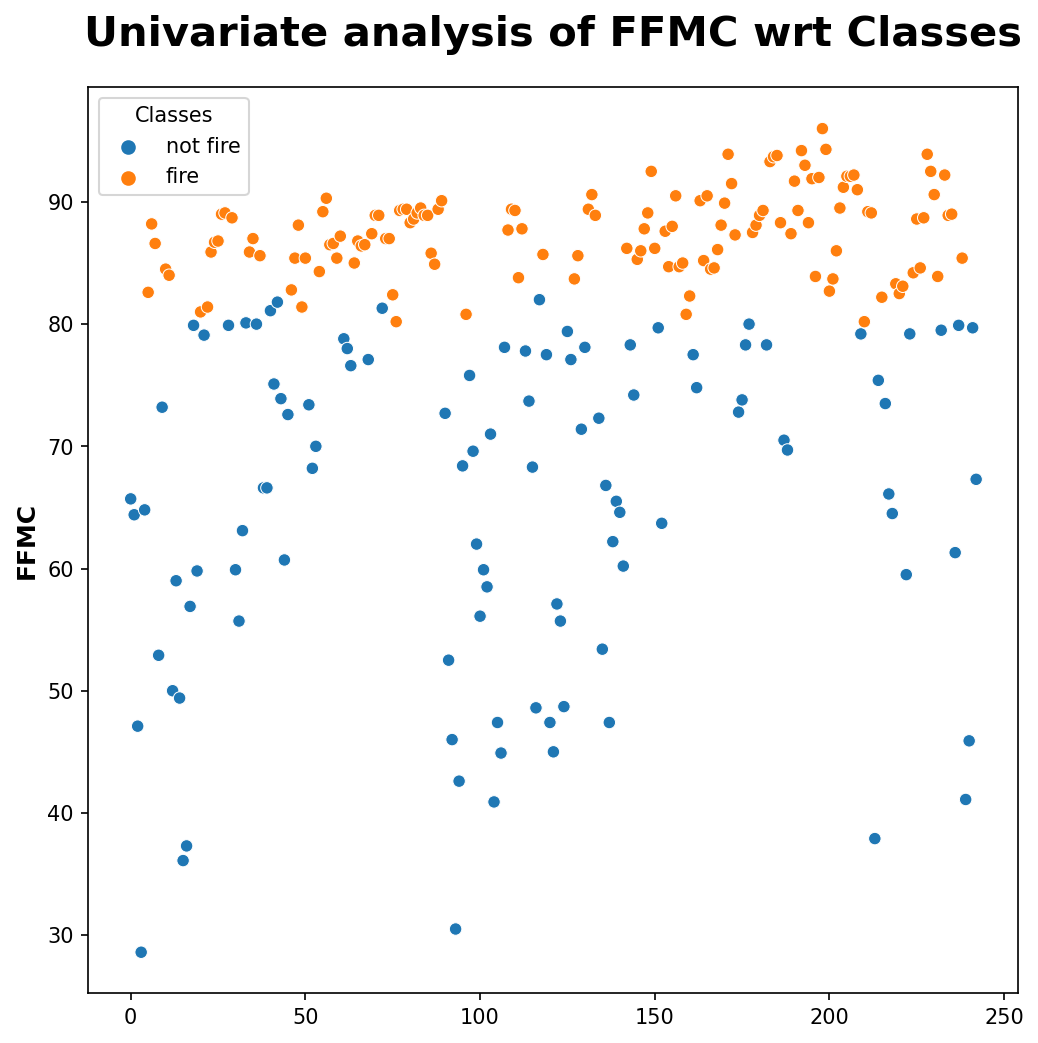

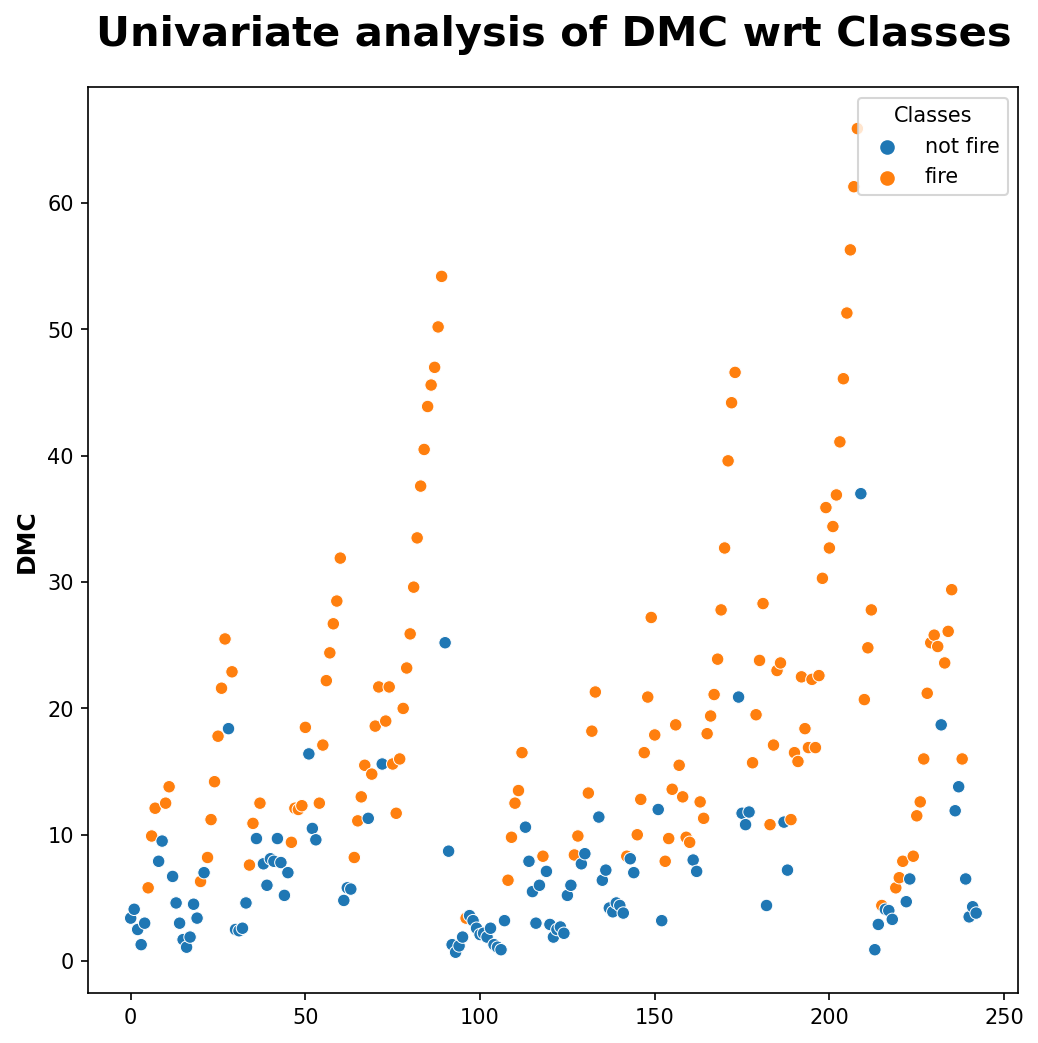

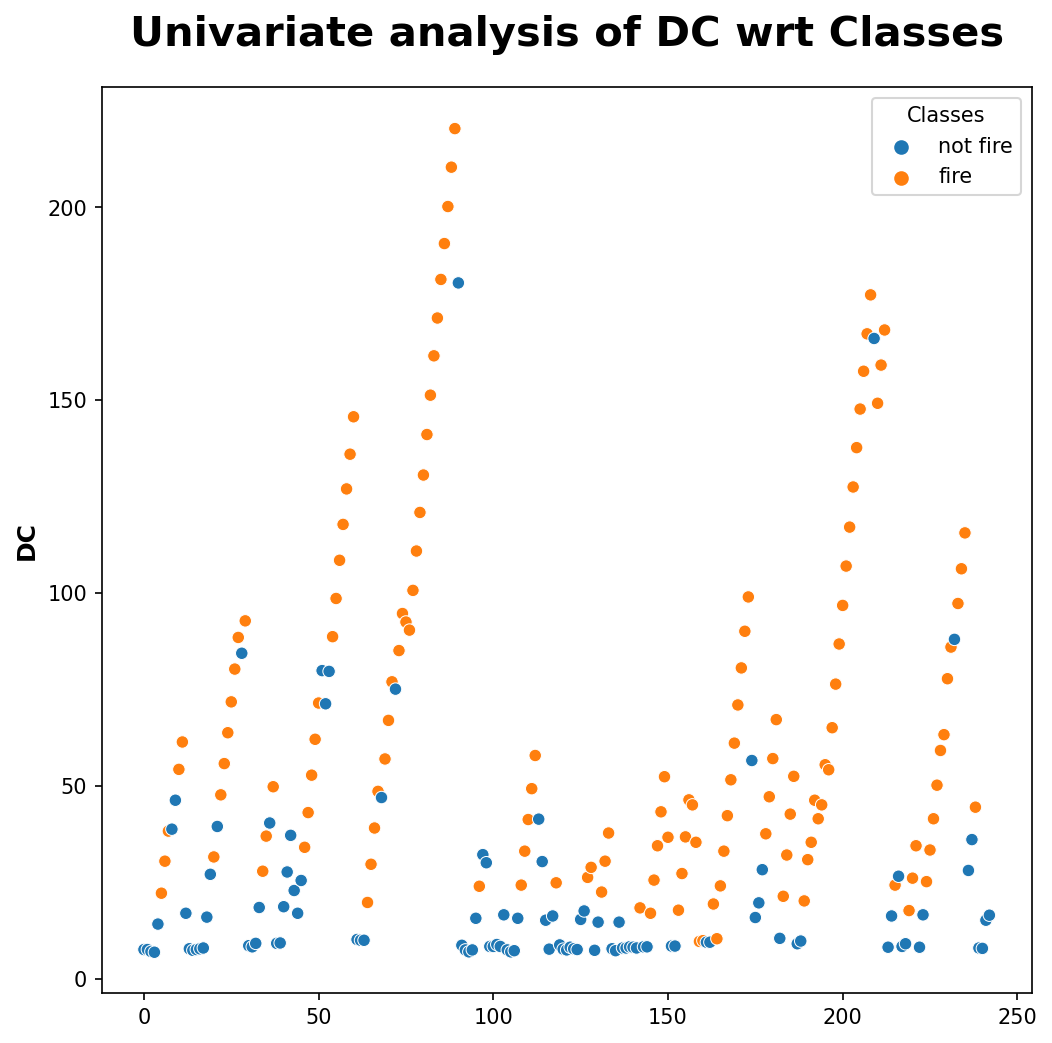

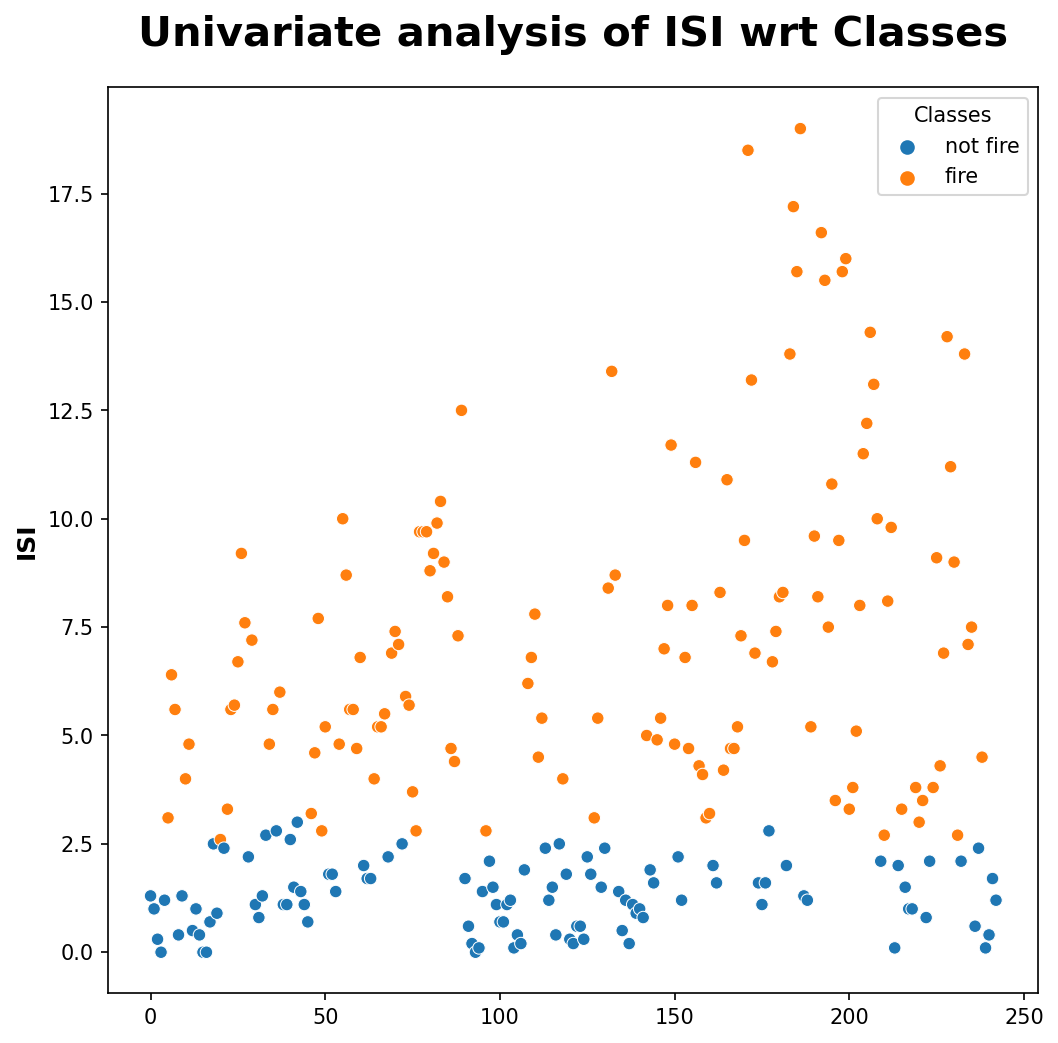

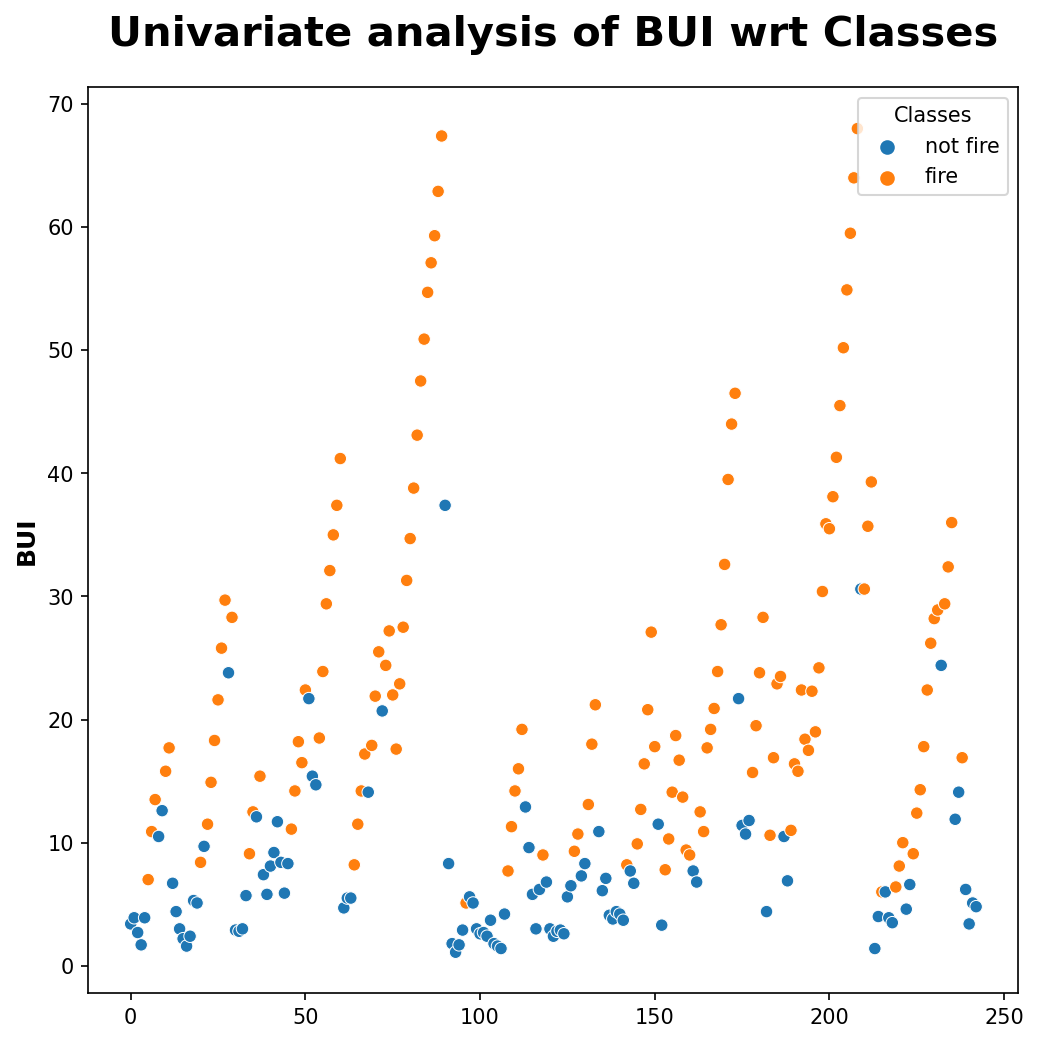

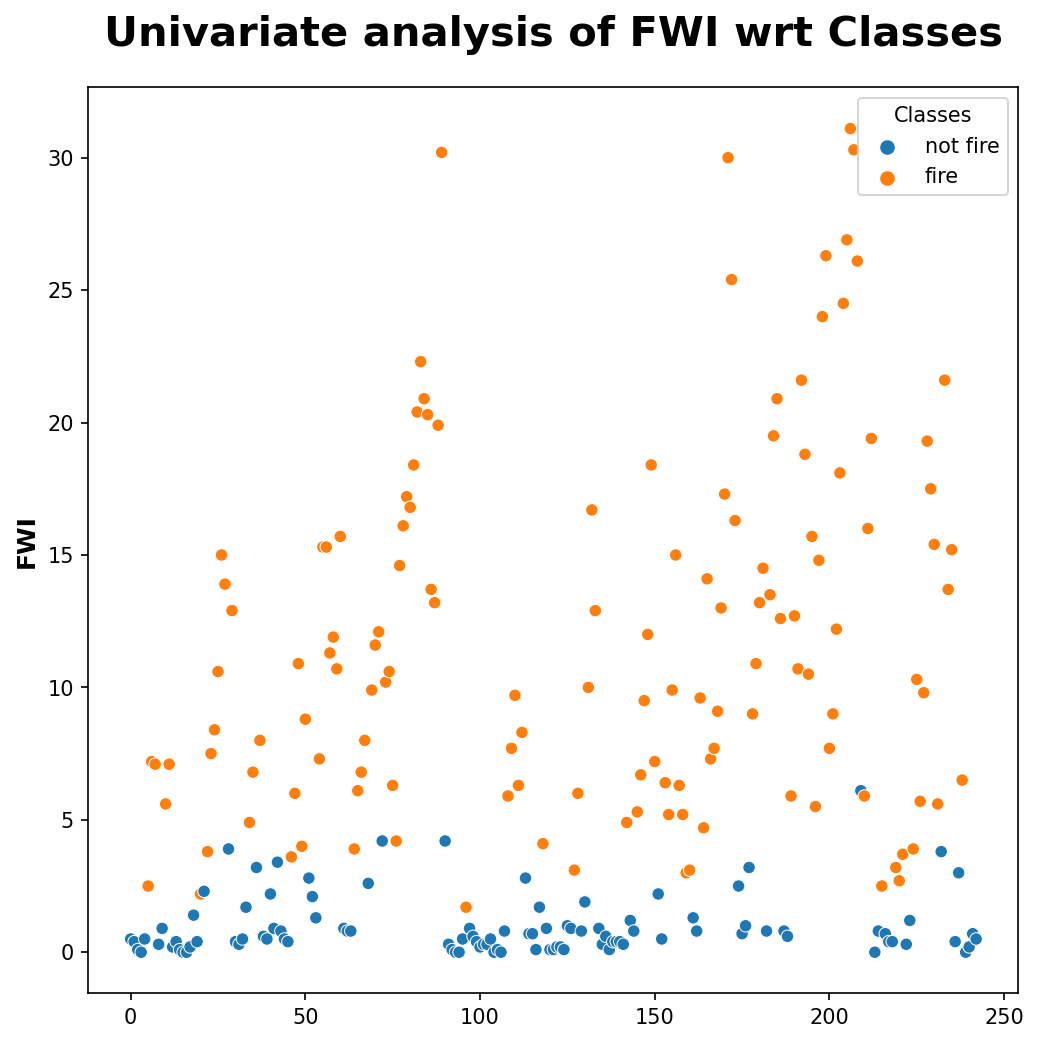

In [148]:
# Distribution w.r.t classes
for i in Numeric_columns:
    plt.figure(figsize=(8,8),dpi=150)
    sns.scatterplot(data=df,x=df.index,y=i,hue='Classes')
    plt.title(f"Univariate analysis of {i} wrt Classes", weight="bold",fontsize=20, pad=20)
    plt.ylabel(i, weight="bold", fontsize=12)
    plt.show()

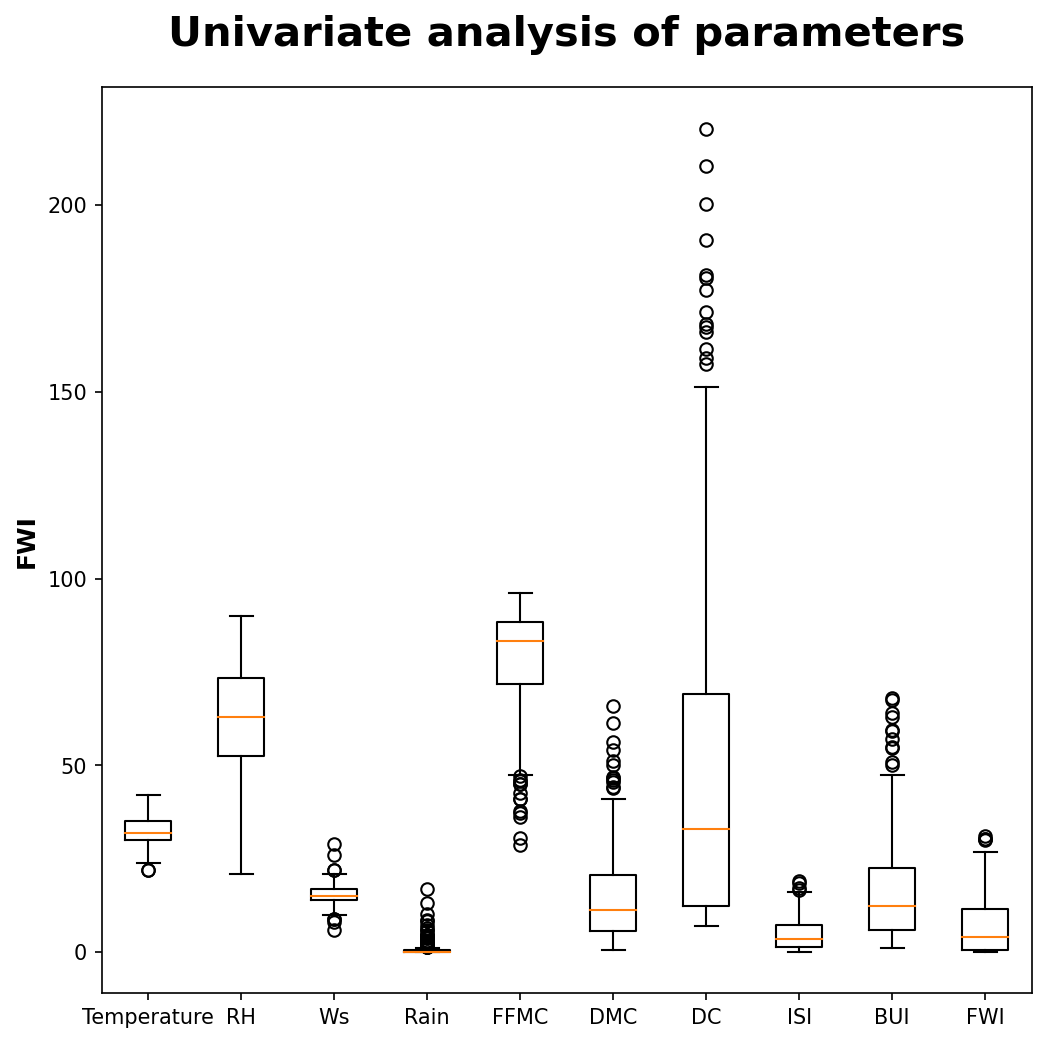

In [149]:
# Box plot
df2 = df[Numeric_columns]
plt.figure(figsize=(8,8),dpi=150)
plt.boxplot(df2.values,labels=Numeric_columns)
plt.title(f"Univariate analysis of parameters", weight="bold",fontsize=20, pad=20)
plt.ylabel(i, weight="bold", fontsize=12)
plt.show()
    
    

We can see the outliers present.

# Bi-Variate analysis

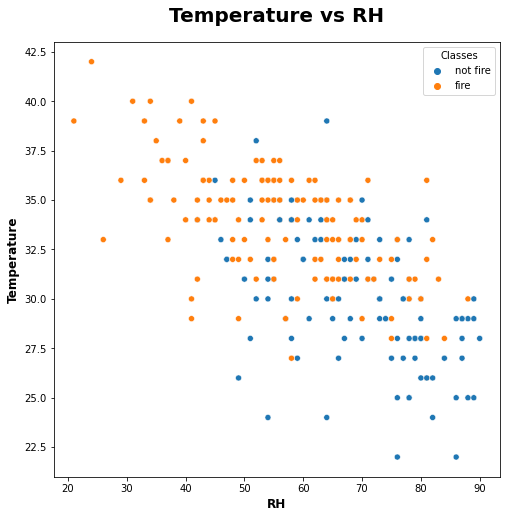

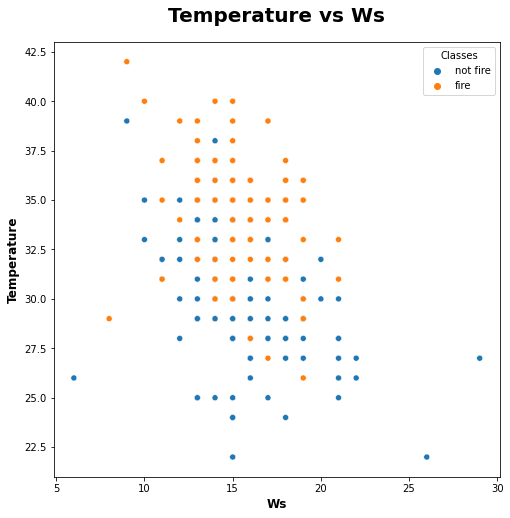

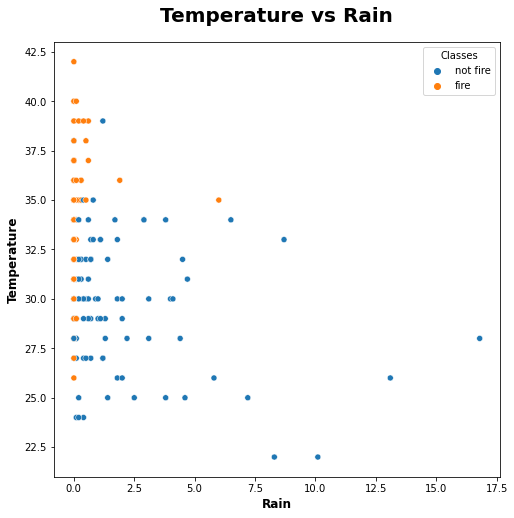

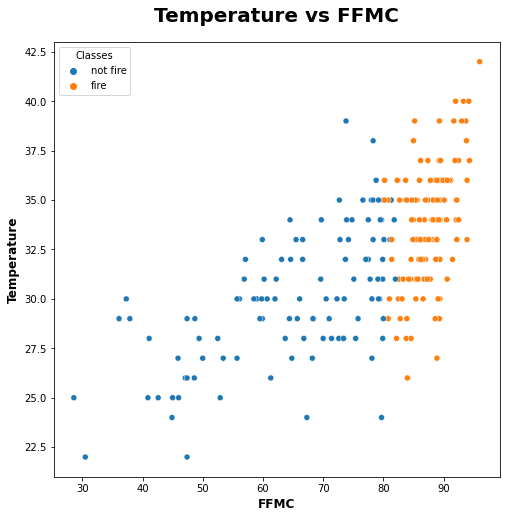

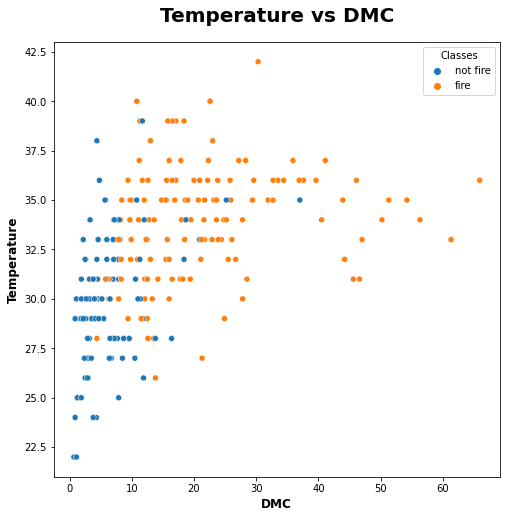

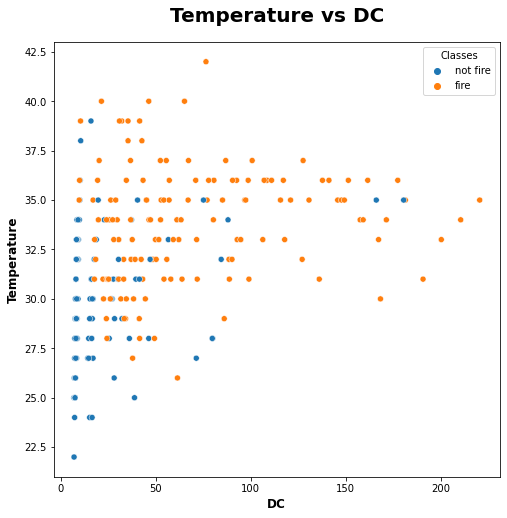

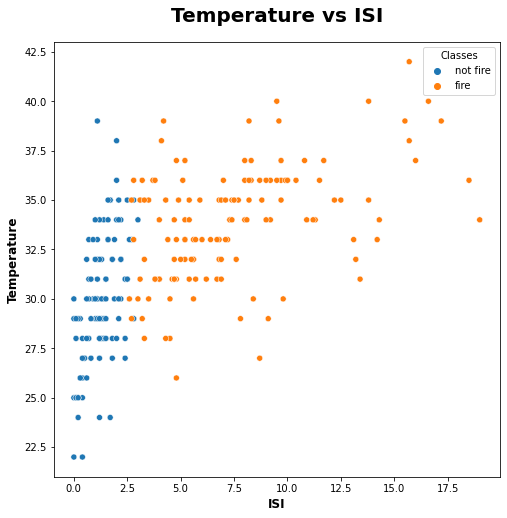

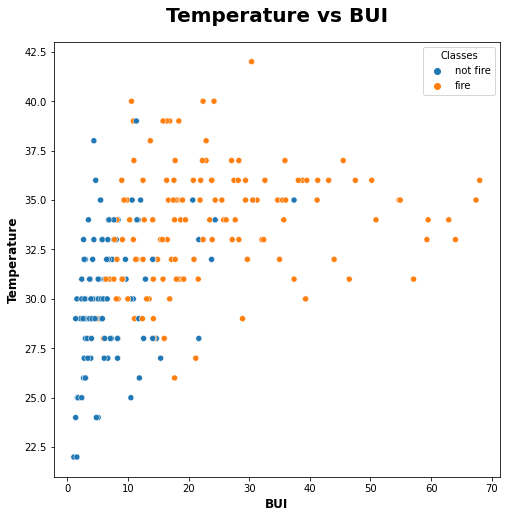

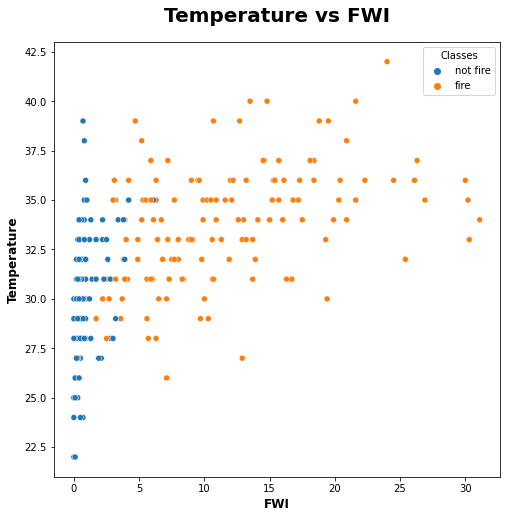

In [150]:
df3 = df[Numeric_columns].drop('Temperature',axis=1)
for i in df3:
    plt.figure(figsize=(8,8))
    sns.scatterplot(data=df,x=i,y='Temperature',hue='Classes')
    plt.title(f"Temperature vs {i}", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Temperature", weight="bold", fontsize=12)
    plt.xlabel(i, weight="bold", fontsize=12)
    plt.show()

# Multivarialte analysis

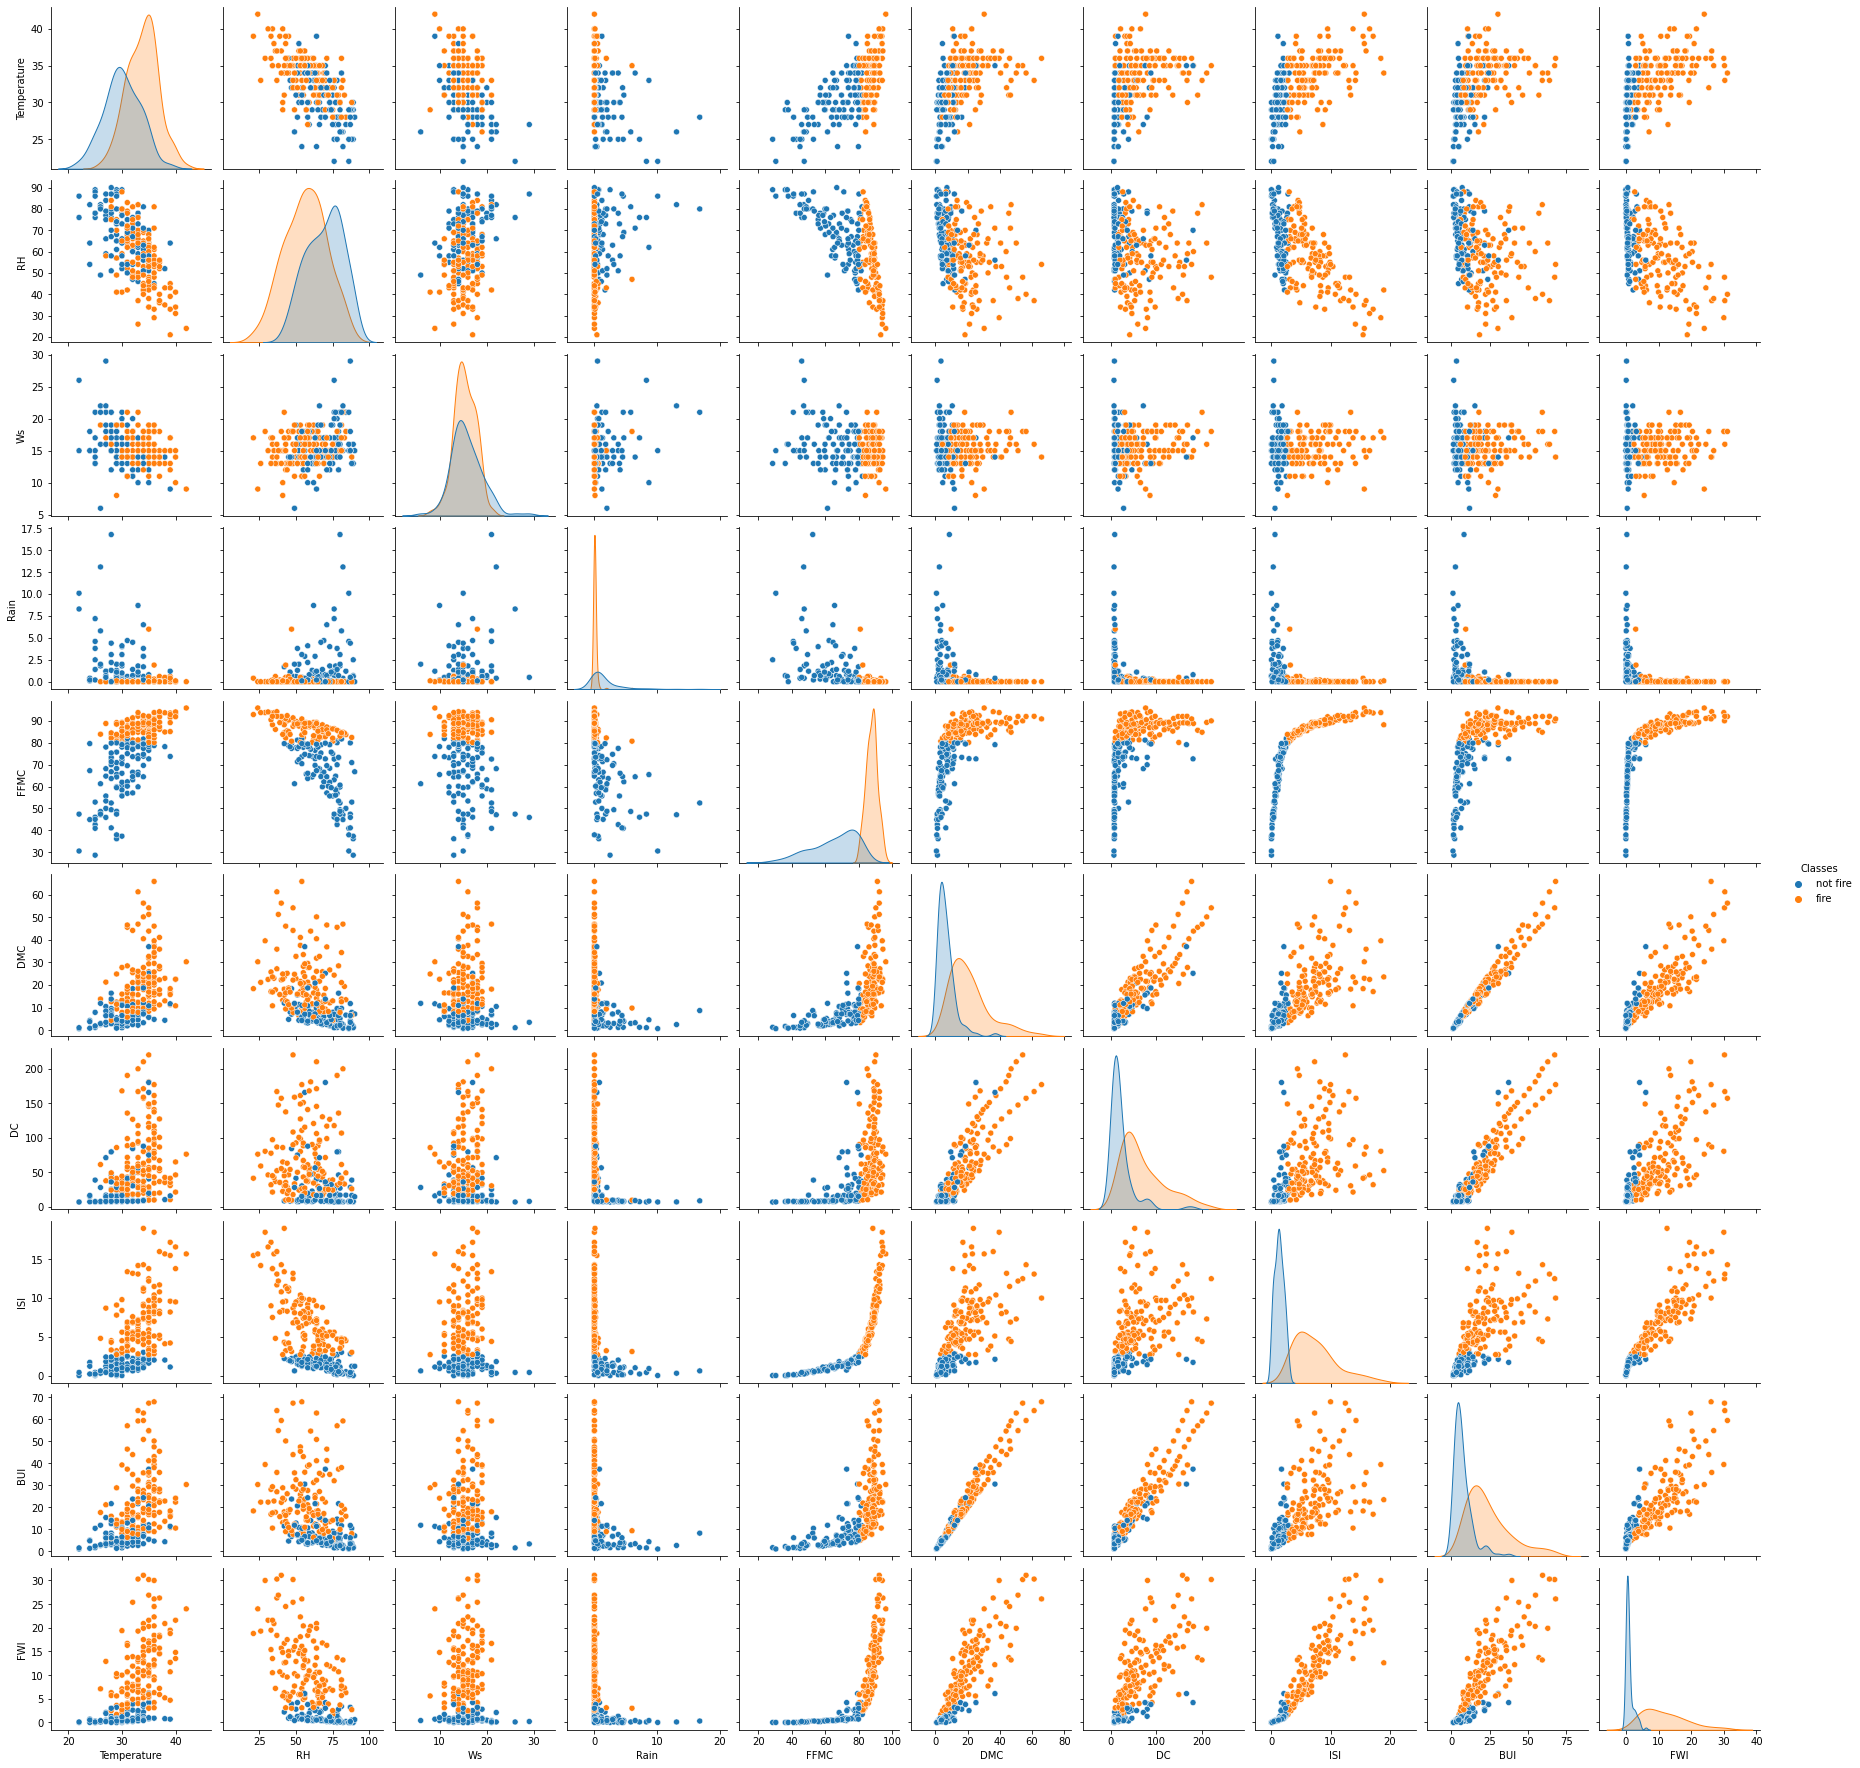

In [151]:
sns.pairplot(data=df.drop(['Region', 'Date'],axis=1),hue='Classes')

# Feature Engineering

In [152]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(dfcopy[['Region', 'Classes']])
# Drop column B as it is now encoded
dfcopy = dfcopy.drop(['Region', 'Classes'],axis = 1)
# Join the encoded df
dfcopy = dfcopy.join(one_hot)

In [153]:
dfcopy.head()

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

   Region_Bejaia  Region_Sidi-Bel  Classes_fire  Classes_not fire  
0              1                0             0                 1  
1              1                0             0                 1  
2              1                0             0                 1  
3              1                0             0                 1  
4              1                0             0                 1

In [154]:
dfcopy.tail()

day month  year Temperature  RH  Ws Rain  FFMC  DMC    DC  ISI   BUI  FWI  \
238  26    09  2012          30  65  14    0  85.4   16  44.5  4.5  16.9  6.5   
239  27    09  2012          28  87  15  4.4  41.1  6.5     8  0.1   6.2    0   
240  28    09  2012          27  87  29  0.5  45.9  3.5   7.9  0.4   3.4  0.2   
241  29    09  2012          24  54  18  0.1  79.7  4.3  15.2  1.7   5.1  0.7   
242  30    09  2012          24  64  15  0.2  67.3  3.8  16.5  1.2   4.8  0.5   

     Region_Bejaia  Region_Sidi-Bel  Classes_fire  Classes_not fire  
238              0                1             1                 0  
239              0                1             0                 1  
240              0                1             0                 1  
241              0                1             0                 1  
242              0                1             0                 1

In [155]:
dfcopy = dfcopy.drop(['Region_Sidi-Bel','Classes_fire'],axis = 1)

In [156]:
dfcopy.head()

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

   Region_Bejaia  Classes_not fire  
0              1                 1  
1              1                 1  
2              1                 1  
3              1                 1  
4              1                 1

# Linear Regression Model - Temperature analysis

In [157]:
X = dfcopy.drop('Temperature',axis=1)
y = dfcopy['Temperature']

In [158]:
X.dtypes

day                 object
month               object
year                object
RH                  object
Ws                  object
Rain                object
FFMC                object
DMC                 object
DC                  object
ISI                 object
BUI                 object
FWI                 object
Region_Bejaia        uint8
Classes_not fire     uint8
dtype: object

In [159]:
y.dtypes

dtype('O')

In [160]:
X.head(3)

day month  year  RH  Ws  Rain  FFMC  DMC   DC  ISI  BUI  FWI  Region_Bejaia  \
0  01    06  2012  57  18     0  65.7  3.4  7.6  1.3  3.4  0.5              1   
1  02    06  2012  61  13   1.3  64.4  4.1  7.6    1  3.9  0.4              1   
2  03    06  2012  82  22  13.1  47.1  2.5  7.1  0.3  2.7  0.1              1   

   Classes_not fire  
0                 1  
1                 1  
2                 1

In [161]:
y.head(2)

0    29
1    29
Name: Temperature, dtype: object

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [164]:
X_train.shape

(170, 14)

In [165]:
y_train.shape

(170,)

In [166]:
X_test.shape

(73, 14)

In [167]:
y_test.shape

(73,)

In [168]:
#standardizing the model
from sklearn.preprocessing import StandardScaler

In [169]:
#initializing standard scaler
sclaer = StandardScaler()

In [170]:
X_train = sclaer.fit_transform(X_train,y_train)

In [171]:
X_test = sclaer.transform(X_test)

In [172]:
#Building the model

In [173]:
model = LinearRegression()

In [174]:
model.fit(X_train,y_train)

LinearRegression()

In [175]:
#Predciting the value 
y_pred = model.predict(X_test)

In [176]:
y_pred

array([32.83876675, 35.0994096 , 30.55578643, 33.04383601, 31.91519203,
       32.20546181, 31.21637687, 34.65944215, 31.98095975, 30.91527496,
       28.39077668, 39.90350079, 34.33422599, 34.47292738, 34.07365718,
       32.79877682, 32.99342119, 25.91103019, 32.88120593, 34.85633817,
       31.06614308, 28.49964609, 33.34101923, 29.02207193, 36.61885294,
       33.87421949, 33.52990762, 33.57502506, 26.98260264, 33.47380454,
       29.67460023, 32.25543459, 32.21261213, 32.98391615, 32.12628393,
       32.90754349, 31.06535424, 34.28928551, 26.56630131, 20.79061222,
       34.33130273, 32.86333296, 34.29204637, 25.10622477, 36.41943458,
       32.78719883, 30.82116209, 30.75244572, 33.14073391, 28.34621455,
       37.23605829, 35.19475135, 33.6250972 , 34.76443853, 33.29965094,
       32.33477137, 32.26998073, 32.51987299, 31.72981255, 36.21920425,
       33.15265008, 30.14714511, 29.04650884, 36.78396218, 31.62621688,
       31.58693795, 33.20891254, 34.37763206, 35.04078754, 24.49

In [180]:
y_test = y_test.astype(float)
res_error = y_pred-y_test

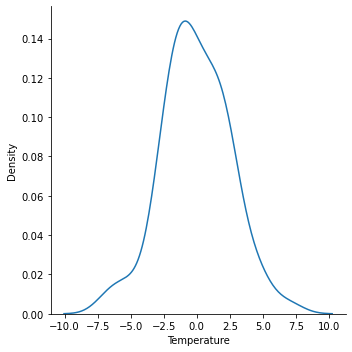

In [181]:
sns.displot(res_error,kind='kde')

In [182]:
from sklearn.metrics import r2_score


In [184]:
score = r2_score(y_pred,y_test)

In [185]:
score

0.3238860315519362

In [186]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [187]:
MAE = mean_absolute_error(y_pred,y_test)

In [188]:
MAE

2.021196072544192

In [189]:
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))

In [190]:
RMSE

2.54614929762301

In [191]:
model.score(X_train,y_train)

0.6005965329643194

# Lasso Regression

In [192]:
from sklearn.linear_model import Lasso

In [212]:

LR = Lasso(alpha=0.1)

In [213]:
LR

Lasso(alpha=0.1)

In [214]:
LR.fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
score_LR = r2_score(y_pred_LR,y_test)
MAE_LR = mean_absolute_error(y_pred_LR,y_test)
RMSE_LR = np.sqrt(mean_squared_error(y_pred_LR,y_test))
LR_score = LR.score(X_train,y_train)
print(f" score_LR: {score_LR}, MAE:{MAE_LR}, RMSE: {RMSE_LR}, LR_score :{LR_score}")


 score_LR: 0.2447991844948374, MAE:1.9146004588691297, RMSE: 2.354675987352547, LR_score :0.586591944580963


# Ridge Regression

In [215]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.1)
RR.fit(X_train,y_train)
y_pred_RR = RR.predict(X_test)
score_RR = r2_score(y_pred_RR,y_test)
MAE_RR = mean_absolute_error(y_pred_RR,y_test)
RMSE_RR = np.sqrt(mean_squared_error(y_pred_RR,y_test))
RR_score = RR.score(X_train,y_train)
print(f" score_LR: {score_RR}, MAE:{MAE_RR}, RMSE: {RMSE_RR}, LR_score :{RR_score}")

 score_LR: 0.3260514760353107, MAE:1.9805274945601985, RMSE: 2.483509132629016, LR_score :0.6000908495643171


# Elastic Net

In [224]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=0.01, l1_ratio=0.9)
EN.fit(X_train,y_train)
y_pred_EN = EN.predict(X_test)
score_EN = r2_score(y_pred_EN,y_test)
MAE_EN = mean_absolute_error(y_pred_EN,y_test)
RMSE_EN= np.sqrt(mean_squared_error(y_pred_EN,y_test))
EN_score = EN.score(X_train,y_train)
print(f" score_LR: {score_EN}, MAE:{MAE_EN}, RMSE: {RMSE_EN}, LR_score :{EN_score}")

 score_LR: 0.3170418929005647, MAE:1.9345373539736397, RMSE: 2.42778662358869, LR_score :0.5969298715701383


# Hyperparameter tuning - Gride search CV.

In [226]:
# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}


In [228]:
from sklearn.model_selection import GridSearchCV

In [233]:
# Defining GridSearchCV for Ridge
grid_cv_model = GridSearchCV(estimator=Ridge(),
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1)
grid_cv_model.fit(X_train,y_train)
y_pred_grid_cv_model = grid_cv_model.predict(X_test)
score_grid_cv_model = r2_score(y_pred_grid_cv_model,y_test)
MAE_grid_cv_model = mean_absolute_error(y_pred_LR,y_test)
RMSE_grid_cv_model = np.sqrt(mean_squared_error(y_pred_grid_cv_model,y_test))
grid_cv_model_score = grid_cv_model.score(X_train,y_train)
print(f" score_LR: {score_grid_cv_model}, MAE:{MAE_grid_cv_model}, RMSE: {RMSE_grid_cv_model}")

Fitting 5 folds for each of 28 candidates, totalling 140 fits
 score_LR: 0.28488162022050245, MAE:1.9146004588691297, RMSE: 2.3921223376967586


In [234]:
grid_cv_model = GridSearchCV(estimator=Lasso(),
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1)
grid_cv_model.fit(X_train,y_train)
y_pred_grid_cv_model = grid_cv_model.predict(X_test)
score_grid_cv_model = r2_score(y_pred_grid_cv_model,y_test)
MAE_grid_cv_model = mean_absolute_error(y_pred_LR,y_test)
RMSE_grid_cv_model = np.sqrt(mean_squared_error(y_pred_grid_cv_model,y_test))
grid_cv_model_score = grid_cv_model.score(X_train,y_train)
print(f" score_LR: {score_grid_cv_model}, MAE:{MAE_grid_cv_model}, RMSE: {RMSE_grid_cv_model}")

Fitting 5 folds for each of 28 candidates, totalling 140 fits
 score_LR: 0.28930395707809, MAE:1.9146004588691297, RMSE: 2.3872578642892415


In [235]:
grid_cv_model = GridSearchCV(estimator=ElasticNet(),
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=5,
                       return_train_score=True,
                       verbose=1)
grid_cv_model.fit(X_train,y_train)
y_pred_grid_cv_model = grid_cv_model.predict(X_test)
score_grid_cv_model = r2_score(y_pred_grid_cv_model,y_test)
MAE_grid_cv_model = mean_absolute_error(y_pred_LR,y_test)
RMSE_grid_cv_model = np.sqrt(mean_squared_error(y_pred_grid_cv_model,y_test))
grid_cv_model_score = grid_cv_model.score(X_train,y_train)
print(f" score_LR: {score_grid_cv_model}, MAE:{MAE_grid_cv_model}, RMSE: {RMSE_grid_cv_model}")

Fitting 5 folds for each of 28 candidates, totalling 140 fits
 score_LR: 0.25288637918244083, MAE:1.9146004588691297, RMSE: 2.356487164664095


In [236]:
grid_cv_model.best_estimator_

ElasticNet(alpha=0.1)

In [239]:
EN = ElasticNet(alpha=0.1, l1_ratio=0.9)
EN.fit(X_train,y_train)
y_pred_EN = EN.predict(X_test)
score_EN = r2_score(y_pred_EN,y_test)
MAE_EN = mean_absolute_error(y_pred_EN,y_test)
RMSE_EN= np.sqrt(mean_squared_error(y_pred_EN,y_test))
EN_score = EN.score(X_train,y_train)
print(f" score_LR: {score_EN}, MAE:{MAE_EN}, RMSE: {RMSE_EN}, LR_score :{EN_score}")

 score_LR: 0.24657393596745858, MAE:1.908980334109286, RMSE: 2.354072178565526, LR_score :0.5876909342467491


We can clearly see that i Linear regression model Elastic net is the best model, taking RMSE as ametric parameter.